# Recurrent Neural Networks (RNNs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

2025-03-11 21:38:15.636151: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.17.0'

## Dataset

In [3]:
%cat "./00_data/Google_Stock_Price_Train.csv"|head

Date,Open,High,Low,Close,Volume
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
1/10/2012,313.7,315.72,307.3,621.43,"8,824,000"
1/11/2012,310.59,313.52,309.4,624.25,"4,817,800"
1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
1/13/2012,311.96,312.3,309.37,623.28,"4,631,800"
cat: stdout: Broken pipe


In [4]:
%cat "./00_data/Google_Stock_Price_Test.csv"|head

Date,Open,High,Low,Close,Volume
1/3/2017,778.81,789.63,775.8,786.14,"1,657,300"
1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"
1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
1/6/2017,795.26,807.9,792.2,806.15,"1,640,200"
1/9/2017,806.4,809.97,802.83,806.65,"1,272,400"
1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
1/11/2017,805,808.15,801.37,807.91,"1,065,900"
1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"


In [5]:
# train data loading 
train_data = pd.read_csv("./00_data/Google_Stock_Price_Train.csv")
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train_data.shape

(1258, 6)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [8]:
train_data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Data Preprocessing

In [9]:
train_set = train_data.loc[:, ["Open"]].values
train_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

### Features scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

norm_encoder = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = norm_encoder.fit_transform(train_set)
train_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [11]:
# make a data structure to predict the next value by 60 previous data points
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(train_set_scaled[i - 60: i, 0])
    y_train.append(train_set_scaled[i, 0])

X_train, y_train =  np.array(X_train), np.array(y_train)

In [12]:
# reshaping the data to 3D tensor: (batch_size, timesteps, input_dim)
# batch_size - a number of observations
# timesteps - a number of prev data points
# input_dim - a number of indicators, for example Open/Close price, the other company stocks price, and etc.
X_train = np.reshape(X_train, (X_train.shape[0], # batch_size
                               X_train.shape[1], # timesteps
                               1))               # Open stock price

## Building the RNN

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    # 1st
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    # 2nd
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    # 3rd
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    # 4th
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    
    Dense(units=1)
])

In [14]:
# Compile the ANN
model.compile(optimizer="adam",
              loss="mean_squared_error")

## Training the model

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.1071
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0059
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0054 
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0048
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0046
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0037
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0040
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0042
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - l

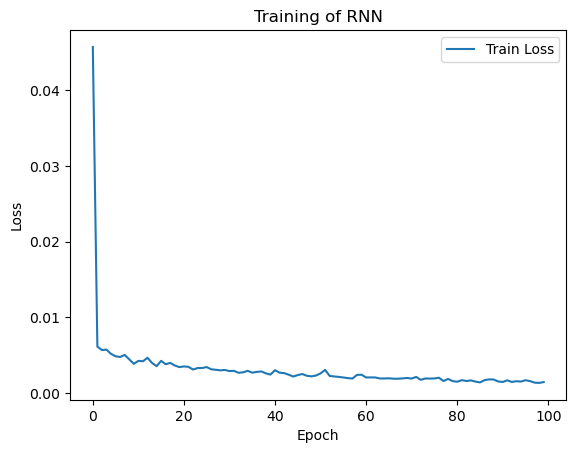

In [16]:
plt.plot(history.history["loss"], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training of RNN")
plt.show()

## Prediction on the test set

In [17]:
# load test set
test_data = pd.read_csv("./00_data/Google_Stock_Price_Test.csv")
real_stock_price = test_data.loc[:, ["Open"]].values
data_total = pd.concat((train_data["Open"], test_data["Open"]), axis=0)
inputs = data_total[len(data_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
# scale
inputs = norm_encoder.transform(inputs)

In [18]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test =  np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  

In [19]:
pred_stock_price = model.predict(X_test)
pred_stock_price = norm_encoder.inverse_transform(pred_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


In [20]:
pred_stock_price

array([[776.7315 ],
       [773.7598 ],
       [774.4026 ],
       [776.20807],
       [779.8817 ],
       [786.12305],
       [791.46313],
       [793.07635],
       [792.91003],
       [792.5495 ],
       [792.4362 ],
       [792.3017 ],
       [792.1452 ],
       [792.68854],
       [793.6044 ],
       [798.5739 ],
       [805.8258 ],
       [813.17004],
       [816.4449 ],
       [810.81287]], dtype=float32)

## Viz the predictions

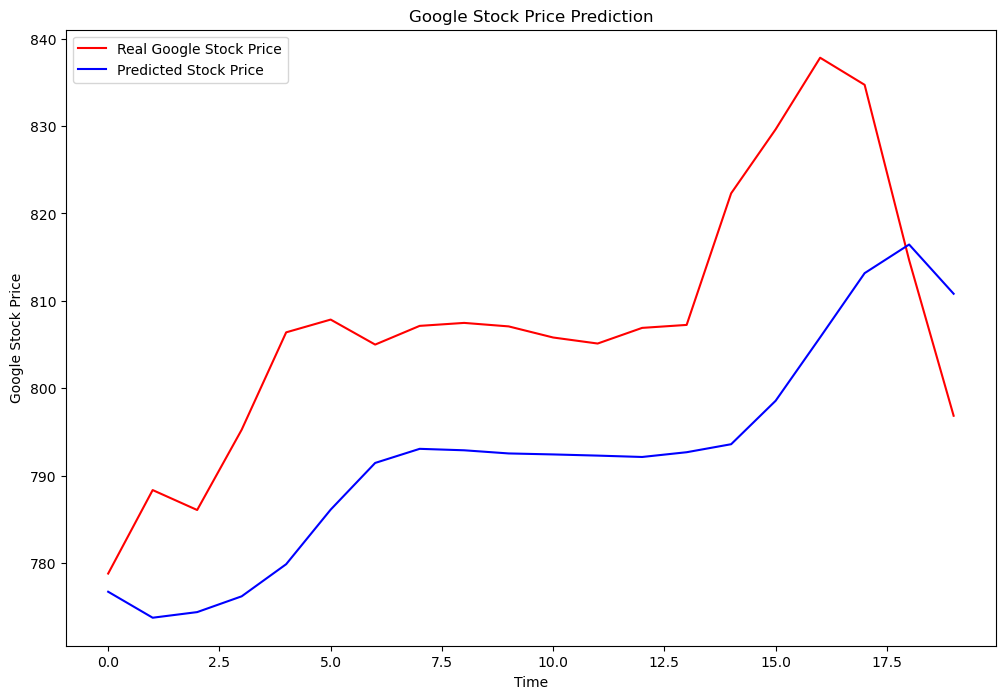

In [21]:
plt.figure(figsize=(12, 8))

plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(pred_stock_price, color="blue", label="Predicted Stock Price")

plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")

plt.legend()
plt.show()